In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

with open('stockcode.csv', 'r') as f:
    code_list = f.read().splitlines()

calculating total trading value: 100%|██████████| 4714/4714 [05:24<00:00, 14.51it/s]


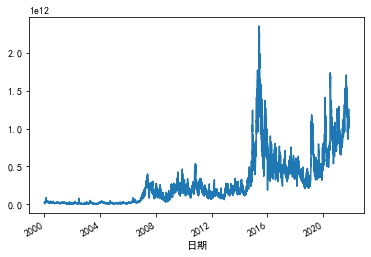

In [3]:
# 统计自2000年以来逐日成交额
tmp = pd.read_csv('data/%s.csv'%code_list[0], encoding='gbk', index_col=0, parse_dates=True)
value = pd.Series(index=tmp.index[tmp.index>=pd.Timestamp('20000101')], dtype=np.float64, name='value').fillna(0)
for code in tqdm(code_list, desc='calculating total trading value'):
    tmp = pd.read_csv('data/%s.csv'%code, encoding='gbk', index_col=0, parse_dates=True)
    assert len(tmp.index) == len(set(tmp.index)), 'invalid multi-index on %s' % code
    tmp = pd.merge(value, tmp['成交金额'], how='left', left_index=True, right_index=True).fillna(0)
    value += tmp['成交金额']
value.plot()

calculating return distribution: 4714it [02:02, 38.59it/s] 


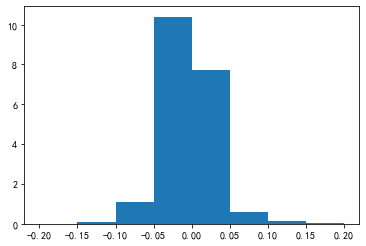

In [4]:
# 统计截面上收益率分布
def stats_return(date):
    date = pd.Timestamp(date)
    ret = np.zeros(shape=(len(code_list),))
    for i, code in tqdm(enumerate(code_list), desc='calculating return distribution'):
        tmp = pd.read_csv('data/%s.csv'%code, encoding='gbk', index_col=0, parse_dates=True)
        assert len(tmp.index) == len(set(tmp.index)), 'invalid multi-index on %s' % code
        if date in tmp.index:
            ret[i] = tmp.loc[date, '收盘价'] / tmp.loc[date, '前收盘'] - 1
        else:
            ret[i] = np.nan
    plt.hist(ret, np.linspace(-0.2, 0.2, 9), density=True)
    return ret
ret = stats_return('20211105')